## Trabajo practico N°2: Regresion Lineal
### Integrantes: Maxim Dorogov  

In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

### Preparacion del dataset

In [2]:
# Lectura del dataset
california_housing = fetch_california_housing()

# Obtenemos los atributos y el target:
X = california_housing.data
y = california_housing.target

# Transformamos los datos a estructuras de Pandas:
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos X e y; esto es útil para generar el mapa de calor de correlaciones
df_california = pd.concat([X, y], axis=1)

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X,  y, test_size=0.3, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=california_housing['feature_names'])

In [3]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


1. **Obtener la correlación** entre los atributos y entre los atributos y el target.
    - ¿Qué atributo tiene mayor correlación lineal con el target? 
    - ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.

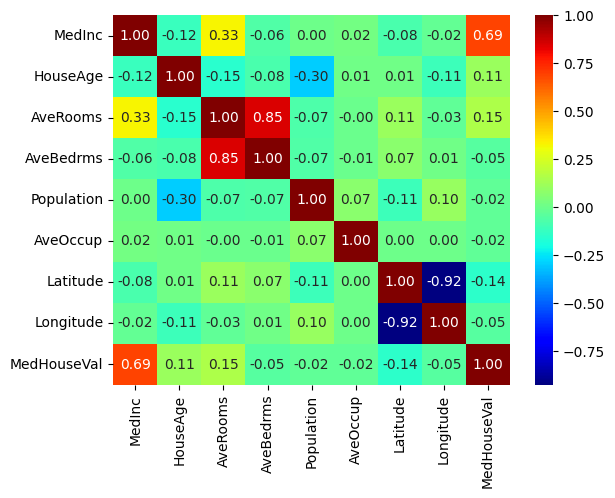

In [8]:
correlation = df_california.corr()
plt.figure()
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f",
    cmap='jet',
    annot_kws={"size": 10},  # Increased font size for annotations
    cbar=True)
plt.show()

- El atributo mas correlacionado con el target es MedInc, ingreso medio en el bloque. Y en 2do lugar la cantidad promedio de habitaciones, seguida por la latitud. En lo personal esperaba alta correlacion entre el target y la cantidad de habitaciones, la correlacion por la latitud se puede explicar por la geografia de California, siendo que para ciertas latitudes se encuentran zonas mas ricas que otras, y por lo tanto con un target que varia en funcion de la logitud.

- Los atributos mas correlacionados entre son son la latitud y la longitud seguidos por la cantidad de habitaciones y la cantidad de dormitorios. Las habitaciones y dormitorios son atributos que tienen una correlacion alta esperada ya que al haber mas habitaciones es logico que algunas se destinen a ser dormitorios. Para el caso de latitud y longitud la correlacion es alta ya que son coordenadas relacionadas entre si.

2. **Graficar los histogramas** de los distintos atributos y del target. 
- ¿Qué forma presentan los histogramas?
- ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?